# __How to detect outliers using IQR and Boxplots?__

_Let's understand what are outliers, how to identify them using iQR and Boxplots and how to treat them if appropriate_

## 1. **What are outliers?**

In statistics, outliers are those specific data points which differ significantly from other data points in the dataset. 

There can be various reasons behind the outliers. It can be because of some event or some experimental/data entry error. Outliers are usually categorized as either __point__ or __pattern outliers__. 

Point outliers are the one which are single instances/datapoints of something abnormal, on the other hand pattern outliers are the clusters of instances/datapoints of something abnormal.

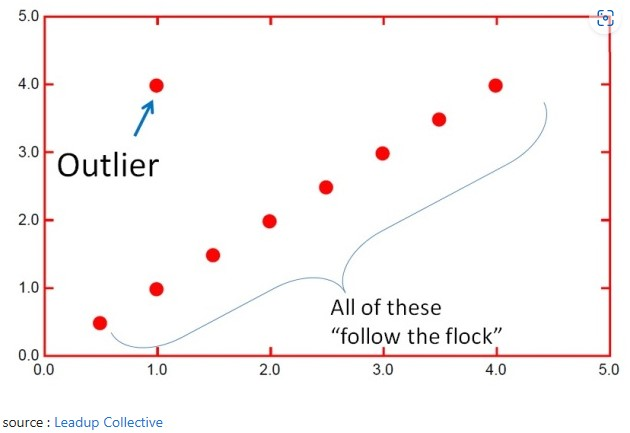

## 2. **Why should you treat the outliers?**

Outliers present in the data can cause various problems:

1. __Outliers might force the algorithm to fit the model away from the true relationship.__ Various algorithms work on minimizing the error/cost function, which can change because of outliers. The image below shows the impact.

2. They can affect the various statistics and significance tests you might do on the data. For example, it can impact the correlation you calculate between two numeric variables. So, __it is a good practice to treat / remove outliers before you calculate correlations.__ 

__Note:__ Outliers are not necessarily a bad thing to have in the data. Sometimes these are just observations that are not following the same pattern than the other ones. 

But it can also be the case that an outlier is very interesting for Science. 

For example, if in a vaccination experiment, a person is infected with COVID-19 whereas all other vaccinated people are immune to COVID-19, then it would be very interesting to understand why. This could lead to new scientific discoveries.  So, it is important to detect outliers. 

So whenever you do identify outliers, don't simply remove or treat them. Maybe such extreme data points can occur again? then consider including those datapoints in your data and let ML learn from them.

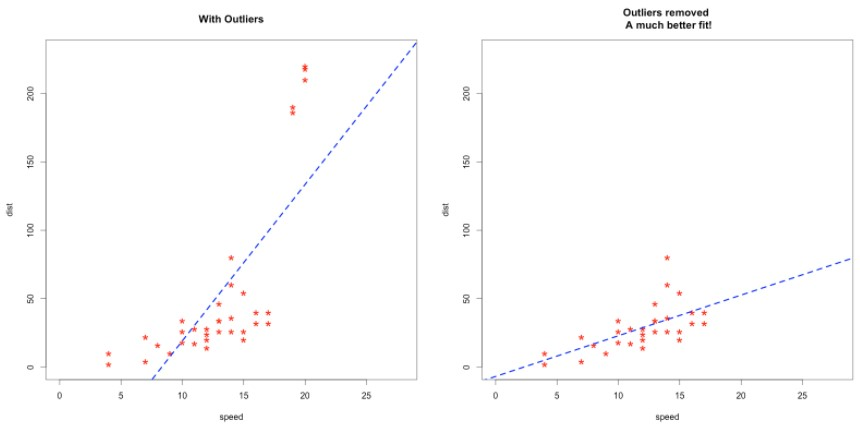

## 3. Detecting Outliers using Box and Whisker Plot

Box Plot is the visual representation to see how a numerical data is spread. It can also be used to detect the outlier. 

It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare data distribution easily across groups.

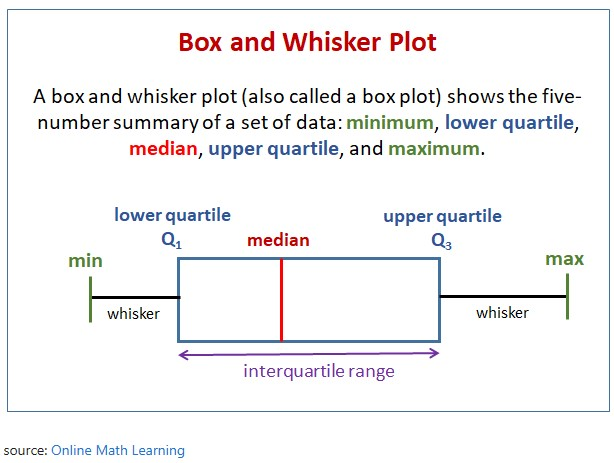

__So how to spot outliers in a box plot?__

Those points that lie outside the whiskers are generally considered as outliers. Where, the whiskers are placed at a distance of 1.5 times the Interquartile Range (IQR) from the edge of the respective box. IQR is nothing but the difference between 3rd quartile and the 1st quartile.

Usually the outlier datapoints are marked as dots in the box plot.

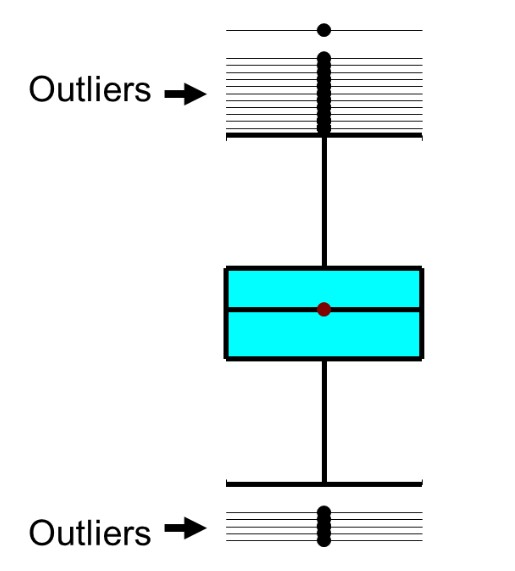

__Import Data__

The only packages we need for this are numpy and pandas for data wrangling, and matplotlib and seaborn for visualization.

In [1]:
# Importing necessary libraries for data visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization based on Matplotlib

# Data manipulation libraries
import numpy as np  # For numerical computing and handling arrays
import pandas as pd  # For data manipulation and analysis (DataFrames)

# Set pandas options to display more rows and columns for better visibility of large datasets
pd.set_option('display.max_rows', 800)  # Display up to 800 rows in a DataFrame
pd.set_option('display.max_columns', 500)  # Display up to 500 columns in a DataFrame

# This magic command ensures that plots are displayed inline (within the Jupyter notebook)
%matplotlib inline


In [5]:
# Load the dataset from a CSV file located at the specified path into a DataFrame
df = pd.read_csv("F:\\Unsupervised-Learning\\datasets\\Churn_Modelling.csv")  # Reading data from the given file path

# Display the first 5 rows of the dataset to get a quick look at its structure and values
df.head()  # This will show the first 5 rows to help us understand the data's format

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [8]:
# Target class name
input_target_class = "Exited"

# Columns to be removed
input_drop_col = "CustomerId"

# Categorical columns
input_cat_columns = ['Surname', 'Geography', 'Gender', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
# Note: 'Gender' appears twice, which might be a mistake or intentional, depending on your data.

# Numerical columns
input_num_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


#### Draw boxplot for all columns one by one

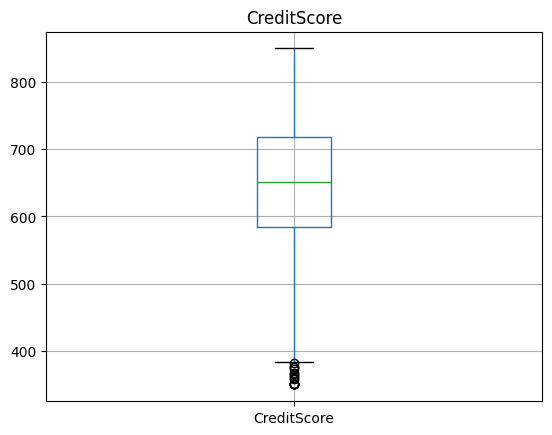

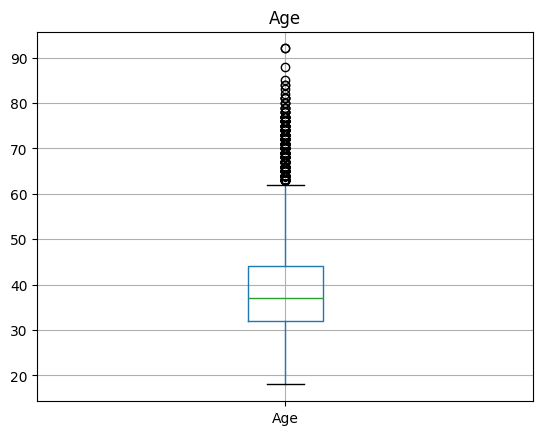

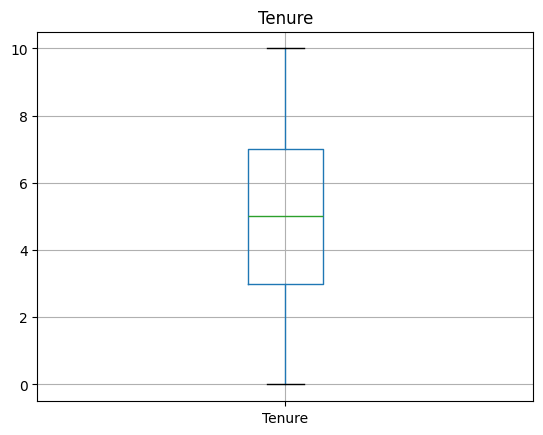

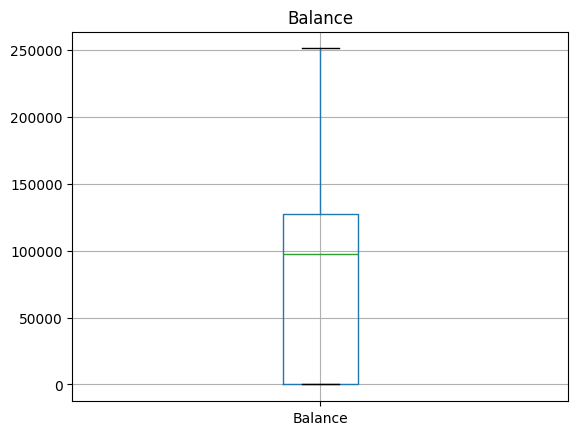

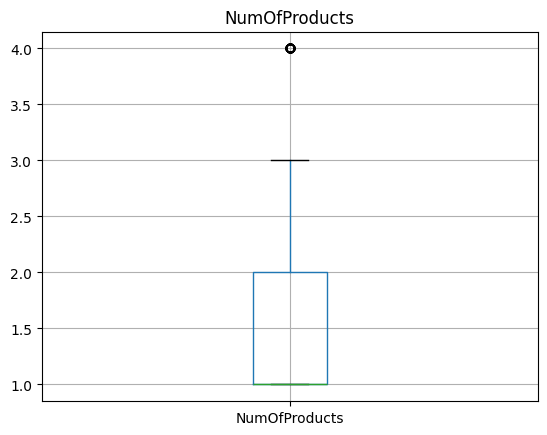

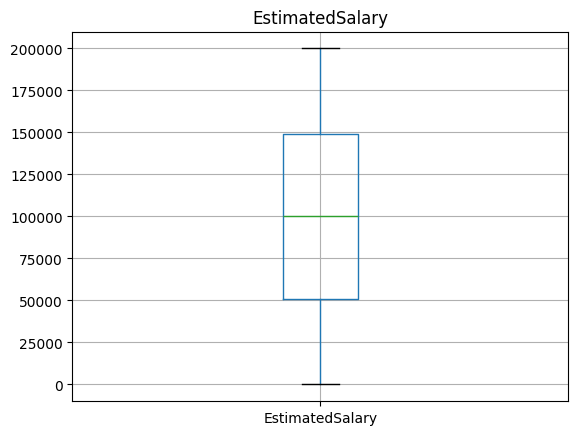

In [32]:
# Loop through each column in the DataFrame 'df'
for column in df:
    
    # Check if the column is present in the list of numerical columns
    if column in input_num_columns:
        
        # Create a new figure for each numeric column to plot
        plt.figure()
        
        # Set the title of the plot to the name of the column
        plt.gca().set_title(column)
        
        # Draw a boxplot for the current numeric column
        df.boxplot([column])


## 4. Compare Boxplots side by side, against each class of the target variable.

C:\Users\SURESH BEEKHANI\AppData\Local\Temp\ipykernel_8724\2519050781.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3, y="CreditScore", x="Exited", palette="Set2")


<Axes: xlabel='Exited', ylabel='CreditScore'>

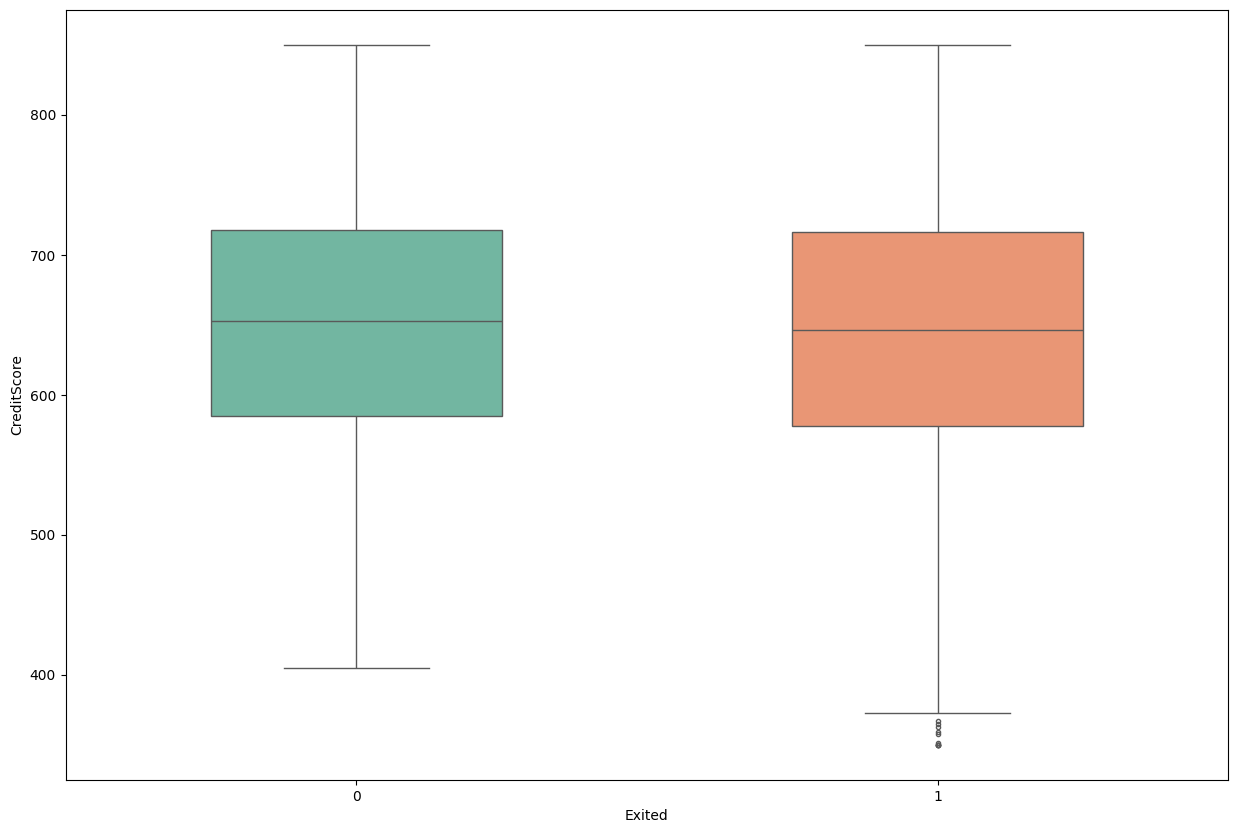

In [13]:
# Create a figure and axis object with a specified size (15x10 inches)
fig, ax = plt.subplots(figsize=(15, 10))

# Create a boxplot using seaborn (sns) with different colors for each category in "Exited"
# - 'palette' specifies the color scheme (you can choose from predefined palettes like "Set2", "coolwarm", etc.)
# - 'data=df' specifies the DataFrame to use
# - 'width=0.5' sets the width of the boxplot
# - 'ax=ax' ensures the plot is drawn on the specified axis
# - 'fliersize=3' sets the size of outlier points (flier points)
# - 'y="CreditScore"' sets the "CreditScore" column as the variable to plot on the y-axis
# - 'x="Exited"' sets the "Exited" column as the categorical variable for the x-axis
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3, y="CreditScore", x="Exited", palette="Set2")

C:\Users\SURESH BEEKHANI\AppData\Local\Temp\ipykernel_8724\667614200.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3, y="NumOfProducts", x="Exited", palette="Set1")


<Axes: xlabel='Exited', ylabel='NumOfProducts'>

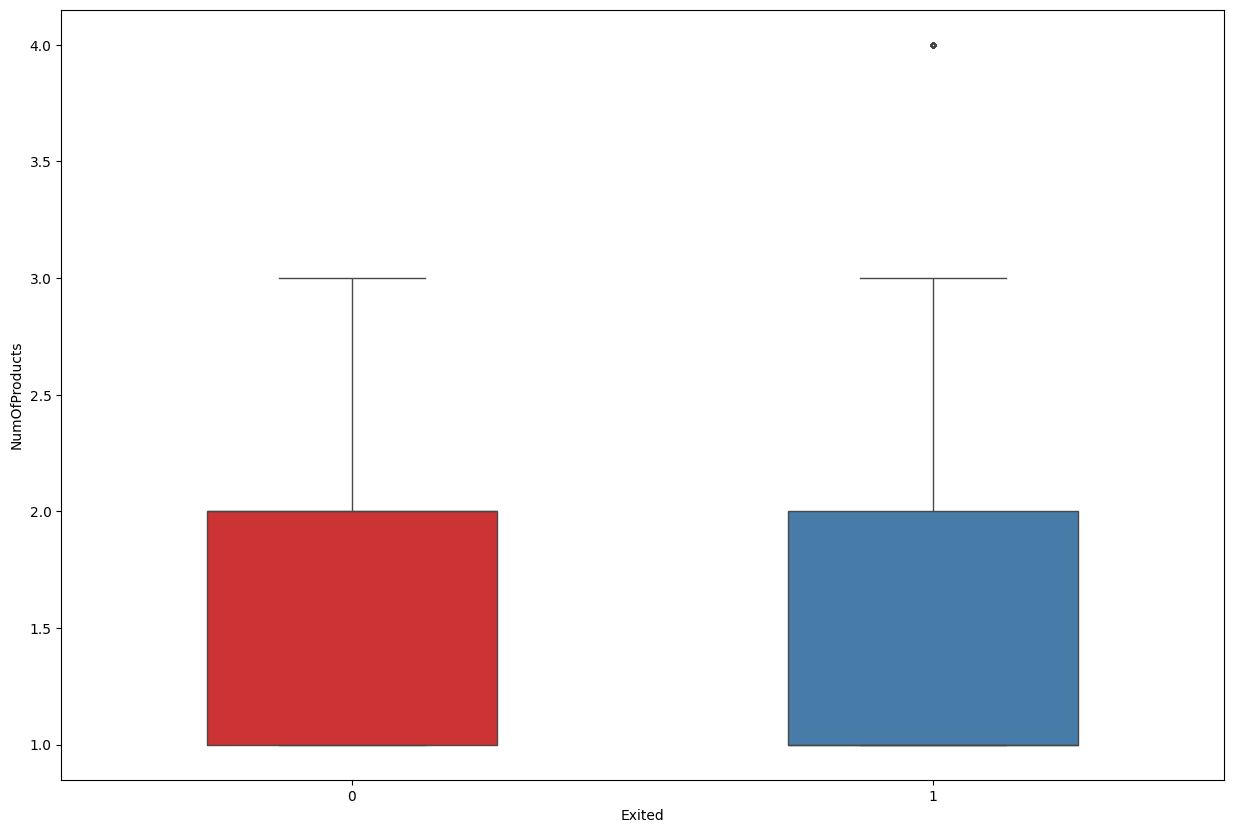

In [19]:
# Create a figure and axis object with a specified size (15x10 inches)
fig, ax = plt.subplots(figsize=(15, 10))

# Create a boxplot using seaborn (sns) with different colors for each category in "Exited"
# - 'palette' specifies the color scheme (you can choose from predefined palettes like "Set1", "coolwarm", etc.)
# - 'data=df' specifies the DataFrame 'df' as the data source for the plot
# - 'width=0.5' sets the width of the boxplot for better visual presentation
# - 'ax=ax' ensures that the plot is drawn on the specified axis object 'ax'
# - 'fliersize=3' sets the size of the outlier points (also known as "fliers")
# - 'y="NumOfProducts"' specifies the column "NumOfProducts" as the variable for the y-axis
# - 'x="Exited"' specifies the column "Exited" as the categorical variable for the x-axis, which groups the data by "Exited"
# - 'palette' will assign distinct colors for each "Exited" group (0 and 1)
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3, y="NumOfProducts", x="Exited", palette="Set1")

C:\Users\SURESH BEEKHANI\AppData\Local\Temp\ipykernel_8724\1732604148.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3, y="Age", x="Exited", palette="Set2")


<Axes: xlabel='Exited', ylabel='Age'>

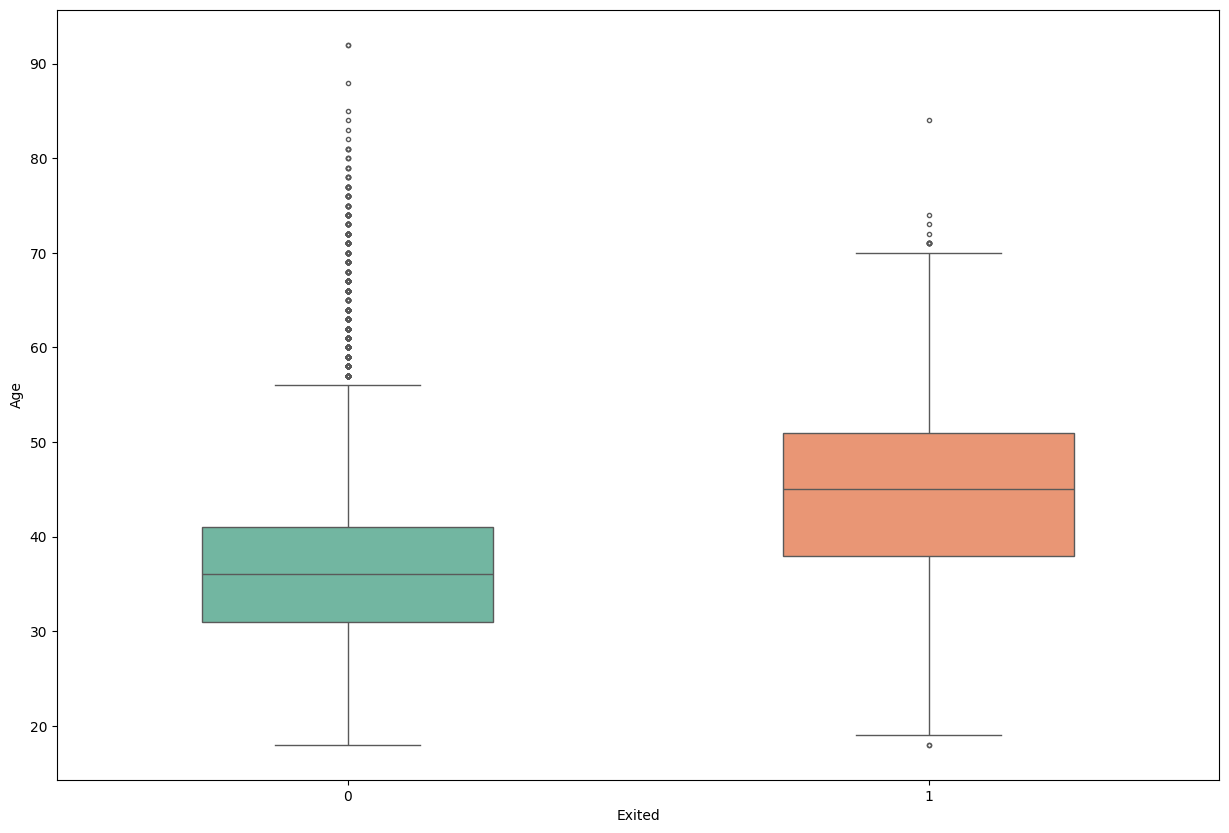

In [21]:
# Create a figure and axis object with a specified size (15x10 inches)
fig, ax = plt.subplots(figsize=(15, 10))

# Create a boxplot using seaborn (sns) with different colors for each category in "Exited"
# - 'palette' specifies the color scheme for the "Exited" categories
# - 'data=df' specifies the DataFrame 'df' as the data source for the plot
# - 'width=0.5' sets the width of the boxplot for better visual presentation
# - 'ax=ax' ensures that the plot is drawn on the specified axis object 'ax'
# - 'fliersize=3' sets the size of the outlier points (also known as "fliers")
# - 'y="Age"' specifies the column "Age" as the variable to be plotted on the y-axis
# - 'x="Exited"' specifies the column "Exited" as the categorical variable for the x-axis, which groups the data by "Exited"
# - 'palette="Set2"' specifies a color palette that will assign different colors to the categories (0 and 1) in "Exited"
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3, y="Age", x="Exited", palette="Set2")

## 5. __Outlier Detection using Interquartile Range (IQR)__

The interquartile range (IQR) is a measure of stastical dispersion which is equal to the difference between 1st and 3rd quartile. It's basically first quartile subtracted from the third quartile.  

IQR = Q₃ − Q₁

How to detect outliers now IQR?

All the values above __Q3 + 1.5*IQR__ and the values below __Q1 - 1.5*IQR__ are outliers. That's basically all the points outside the whiskers.

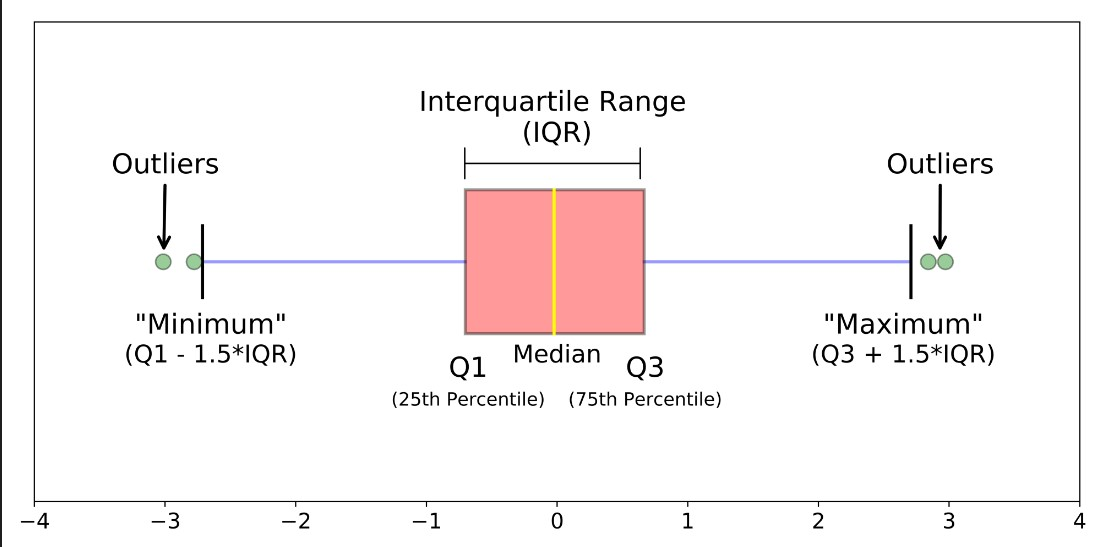



__Steps to perform Outlier Detection by identifying the lowerbound and upperbound of the data:__

1. Arrange your data in ascending order
2. Calculate Q1 ( the first Quarter)
3. Calculate Q3 ( the third Quartile)
4. Find IQR = (Q3 - Q1)
5. Find the lower Range = Q1 -(1.5 * IQR)
6. Find the upper Range = Q3 + (1.5 * IQR)

Let's find the outliers in the LSTAT feaure in boston df

Find the 1st and 3rd quartiles.

In [23]:
# Find the 1st and 3rd quartiles
# We use the np.nanpercentile function to ignore the missing values (NaNs) just in case

# Compute the 1st quartile (25th percentile) of the data using the 'midpoint' method
q1 = np.nanpercentile(data, 25, method='midpoint') 

# Compute the 2nd quartile (50th percentile or median) of the data using the 'midpoint' method
q2 = np.nanpercentile(data, 50, method='midpoint') 

# Compute the 3rd quartile (75th percentile) of the data using the 'midpoint' method
q3 = np.nanpercentile(data, 75, method='midpoint') 

# Calculate the Interquartile Range (IQR) by subtracting the 1st quartile from the 3rd quartile
IQR = q3 - q1

# Print the Interquartile Range (IQR)
print('Interquartile range is', IQR)

Interquartile range is 134.0


<Axes: >

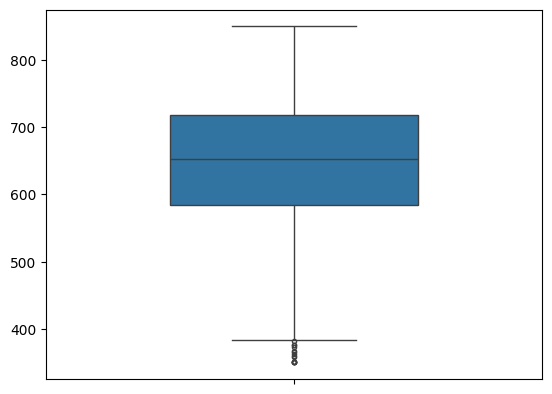

In [24]:
# Create a boxplot using seaborn (sns) to visualize the distribution of sorted data
# - 'data=sort_data' specifies that the sorted data (previously computed) will be used for the boxplot
# - 'width=0.5' sets the width of the boxplot for better visual presentation
# - 'fliersize=3' sets the size of the outlier points (also known as "fliers") on the plot
sns.boxplot(data=sort_data, width=0.5, fliersize=3)

### Calculate the upper and lower limit for outliers.

In [25]:
# Calculate the lower limit for outliers using the formula: Q1 - 1.5 * IQR
# The lower limit is used to identify outliers below this value.
lower_limit = q1 - 1.5 * (q3 - q1)

# Calculate the upper limit for outliers using the formula: Q3 + 1.5 * IQR
# The upper limit is used to identify outliers above this value.
upper_limit = q3 + 1.5 * (q3 - q1)

# Print the calculated lower limit
print(lower_limit)

# Print the calculated upper limit
print(upper_limit)

383.0
919.0


In [26]:
# Identify the outliers below the lower limit
# - 'sort_data < lower_limit' filters the data and selects values less than the lower limit
lower_limitoutliers = sort_data[sort_data < lower_limit]

# Identify the outliers above the upper limit
# - 'sort_data > upper_limit' filters the data and selects values greater than the upper limit
upper_limitoutliers = sort_data[sort_data > upper_limit]

In [27]:
upper_limitoutliers

array([], dtype=int64)

In [28]:
lower_limitoutliers

array([350, 350, 350, 350, 350, 351, 358, 359, 363, 365, 367, 373, 376,
       376, 382])

__Treating Outliers__

Optionally, you can replace the values outside the limits with respective threshold. But in this context, it's not needed. So, I am commenting out the following code.



In [29]:
# Cap the values in sort_data that are below the lower limit to the lower limit
# - This replaces any value in sort_data that is less than the lower limit with the lower limit value.
sort_data[sort_data < lower_limit] = lower_limit

# Cap the values in sort_data that are above the upper limit to the upper limit
# - This replaces any value in sort_data that is greater than the upper limit with the upper limit value.
sort_data[sort_data > upper_limit] = upper_limit

<Axes: >

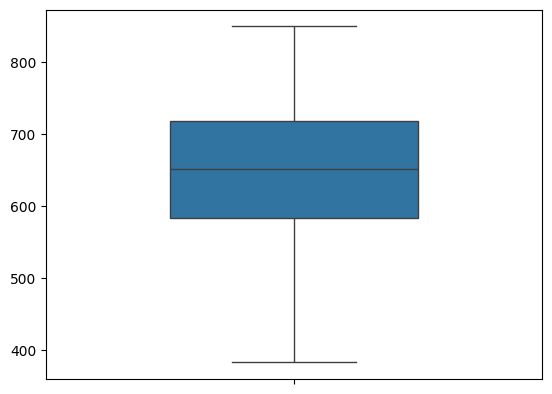

In [31]:
# Create a boxplot using seaborn (sns) to visualize the distribution of capped sorted data
# - 'data=sort_data' specifies the capped sorted data (after handling outliers) as the data for the boxplot
# - 'width=0.5' sets the width of the boxplot for better visual presentation
# - 'fliersize=3' adjusts the size of the outlier points (also known as "fliers") on the plot
sns.boxplot(data=sort_data, width=0.5, fliersize=3)

# anomaly detection using z_score

In [41]:
# Import libraries for data manipulation and analysis
import numpy as np       # NumPy: Used for numerical computations and handling arrays
import pandas as pd      # Pandas: Used for data manipulation and analysis
from pandas import DataFrame  # Import DataFrame class directly from pandas

# Import libraries for data visualization
import seaborn as sns    # Seaborn: Used for statistical data visualization
import matplotlib.pyplot as plt  # Matplotlib: Used for creating static, animated, and interactive plots

# Import math library for mathematical operations
import math

# Set pandas options to customize display settings for better visibility of data
# - 'display.max_rows': Allows the display of up to 800 rows in DataFrame output
# - 'display.max_columns': Allows the display of up to 500 columns in DataFrame output
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

# Enable inline plotting for Jupyter Notebooks
# - Ensures that plots generated by matplotlib appear directly in the notebook output
%matplotlib inline

In [44]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv(r"F:\Unsupervised-Learning\datasets\Churn_Modelling.csv")  # Use raw string (r) to avoid escape character issues

# Display the first 5 rows of the loaded DataFrame to preview the data
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
# Compute the mean and standard deviation of the 'CreditScore' column, ignoring NaN values

# Calculate the mean of 'CreditScore' while ignoring NaNs
cr_mean = np.nanmean(df['CreditScore'].values.tolist())
# np.nanmean computes the arithmetic mean, ignoring NaNs
# df['CreditScore'].values.tolist() converts the 'CreditScore' column to a list

# Calculate the standard deviation of 'CreditScore' while ignoring NaNs
cr_std = np.nanstd(df['CreditScore'].values.tolist())
# np.nanstd computes the standard deviation, ignoring NaNs
# df['CreditScore'].values.tolist() converts the 'CreditScore' column to a list

# Display the computed mean and standard deviation
print("Mean Credit Score is: ", cr_mean)
print("Std Credit Score is: ", cr_std)


Mean Credit Score is:  650.5613
Std Credit Score is:  96.55387429984361


In [51]:
# Calculate the z-score for the 'CreditScore' column and create a new column to store the results
# Z-score is calculated using the formula: (value - mean) / standard deviation
df['zscore_CreditScore'] = (df['CreditScore'] - cr_mean) / cr_std

# Display the first 5 rows of selected columns to preview the data
# - 'Surname': Displays the surname of the customers
# - 'CreditScore': Displays the original credit score values
# - 'zscore_CreditScore': Displays the calculated z-scores for each credit score
df[["Surname", "CreditScore", "zscore_CreditScore"]].head()


,Surname,CreditScore,zscore_CreditScore
0,Hargrave,383,-2.771109
1,Hill,383,-2.771109
2,Onio,383,-2.771109
3,Boni,383,-2.771109
4,Mitchell,383,-2.771109


In [52]:
# Identify extreme values in the dataset based on z-scores of the 'CreditScore' column
# Extreme values are defined as those with z-scores less than -3 or greater than 3
# - A z-score < -3 indicates a value is more than 3 standard deviations below the mean
# - A z-score > 3 indicates a value is more than 3 standard deviations above the mean
x = df[(df['zscore_CreditScore'] < -3) | (df['zscore_CreditScore'] > 3)]

# The resulting DataFrame 'x' contains all rows from 'df' where 'zscore_CreditScore' is an extreme value

In [54]:
x.head(30)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,zscore_CreditScore


In [55]:
# Calculate the upper bound for extreme values based on a z-score of +3
# The formula is: (mean + 3 * standard deviation)
z_3 = (3 * cr_std) + cr_mean
# This gives the value that is 3 standard deviations above the mean
# Print the result to check the upper bound for extreme values
print(z_3)

# Calculate the lower bound for extreme values based on a z-score of -3
# The formula is: (mean - 3 * standard deviation)
z_minus3 = cr_mean - (3 * cr_std)
# This gives the value that is 3 standard deviations below the mean
# Print the result to check the lower bound for extreme values
print(z_minus3)

940.2229228995308
360.89967710046915


### Normal Distribution

This code demonstrates how to work with a normal distribution, often used in statistics for modeling data.

In [59]:
# Escaping backslashes by using double backslashes
df = pd.read_csv("F:\\Unsupervised-Learning\\datasets\\Churn_Modelling.csv")


In [61]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
data = df.CreditScore
sort_data = np.sort(data) 
sort_data

array([350, 350, 350, ..., 850, 850, 850])

In [75]:

cr_mean = np.nanmean(df.CreditScore.values.tolist())
cr_std = np.nanstd(df.CreditScore.values.tolist())



In [76]:
cr_mean

np.float64(650.5288)

In [77]:
cr_std

np.float64(96.64846595037089)

In [78]:
from scipy.stats import norm

In [79]:
x = norm.pdf(data, cr_mean, cr_std)

In [80]:
x

array([0.00391387, 0.00374687, 0.00126727, ..., 0.00343745, 0.00187371,
       0.001414  ])

In [81]:
ther = 0.0001

In [84]:
outliers = data[x < ther]

print("Outliers based on PDF:")
print(outliers)

Outliers based on PDF:
7       376
942     376
1193    363
1405    359
1631    350
1838    350
1962    358
2473    351
2579    365
5285    386
5494    383
8154    367
8723    350
8762    350
9210    382
9356    373
9624    350
Name: CreditScore, dtype: int64


<Axes: ylabel='CreditScore'>

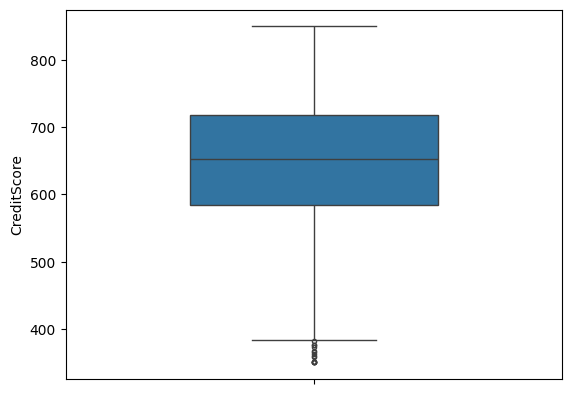

In [86]:
# Create a boxplot using seaborn
# - 'data' is the input data for the boxplot, which is a one-dimensional array of values (e.g., sorted data or a column from a DataFrame)
# - 'width=0.5' sets the width of the box in the boxplot for better visual presentation (a smaller value makes the box narrower)
# - 'fliersize=3' controls the size of the outliers (also known as "fliers") in the boxplot. A larger number makes them bigger
sns.boxplot(data, width=0.5, fliersize=3)
